Arc length: 95.31458268663492, Radius: 75.5894056387733
Arc length: 155.5433335023377, Radius: 86.52187760442827
Arc length: 149.45878943956376, Radius: 83.11853348547695
Arc length: 137.4777988478695, Radius: 40.18632389979129
Arc length: 108.9346918172562, Radius: 77.3073830398211
Arc length: 180.41800409275805, Radius: 43.10270407458098
Arc length: 226.6103509524437, Radius: 3132.2874507543966
Arc length: 212.91685776614776, Radius: 589.6306080734835
Arc length: 214.31108189583588, Radius: 859.4572123252581


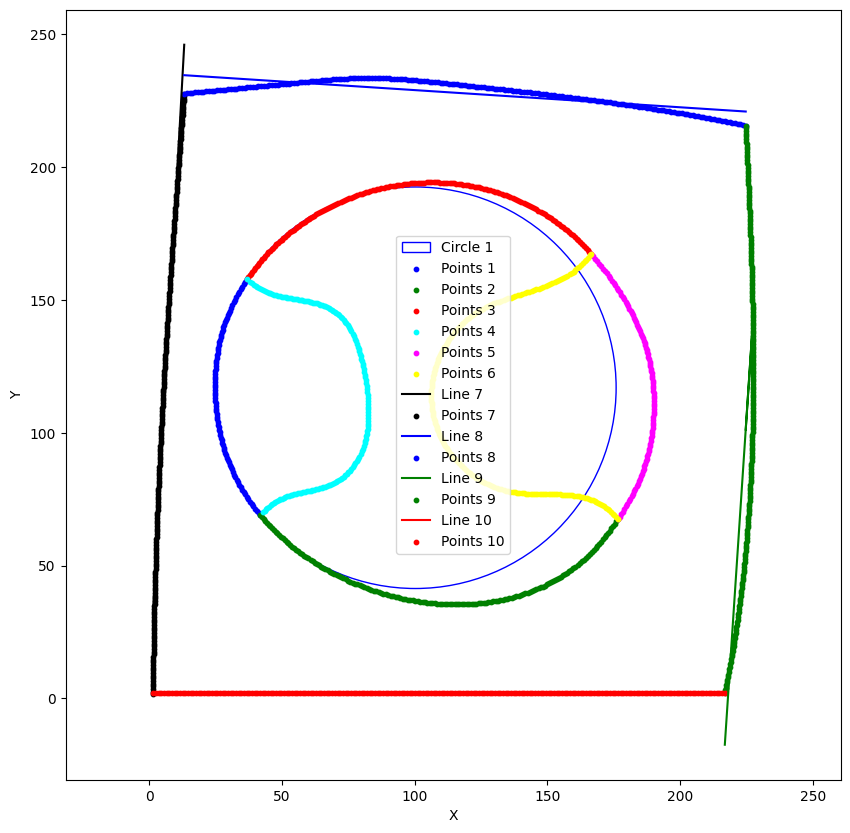

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/frag0.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

Arc length: 95.31458268663492, Radius: 75.5894056387733
Arc length: 155.5433335023377, Radius: 86.52187760442827
Arc length: 286.9365865249208, Radius: 62.14445045396488
Arc length: 289.3536959100142, Radius: 43.22225408264105
Arc length: 226.6103509524437, Radius: 3132.2874507543966
Arc length: 212.91685776614776, Radius: 589.6306080734835
Arc length: 214.31108189583588, Radius: 859.4572123252581


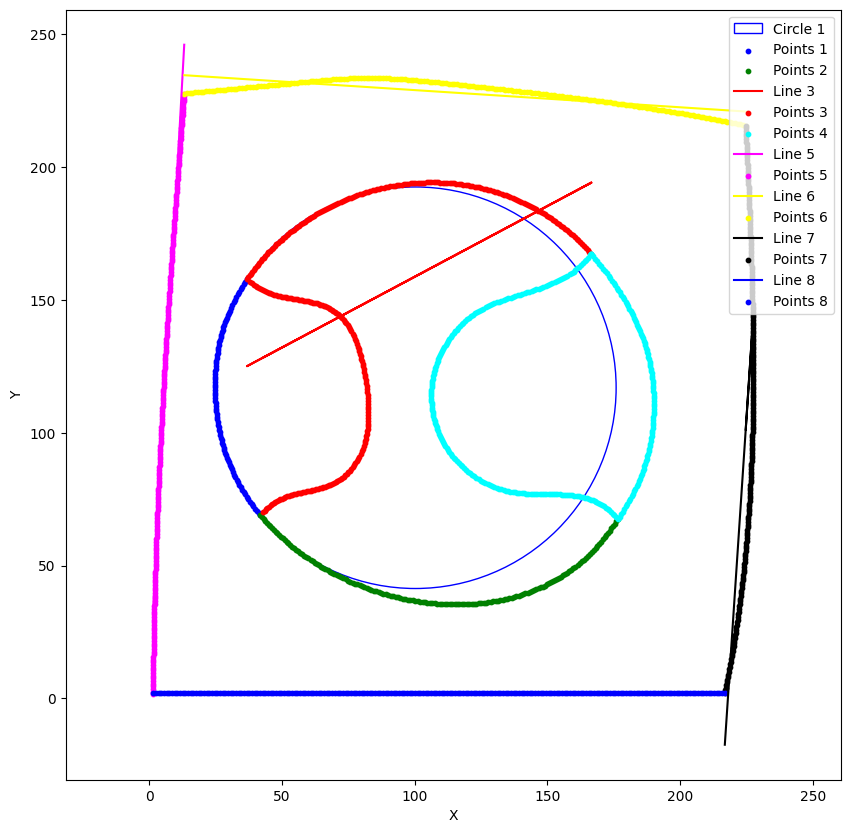

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/frag1.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

Arc length: 429.4994577550963, Radius: 68.13670281575898
Arc length: 552.5029293716507, Radius: 48.34855109491441
Arc length: 436.52091858592235, Radius: 63.72440486405535


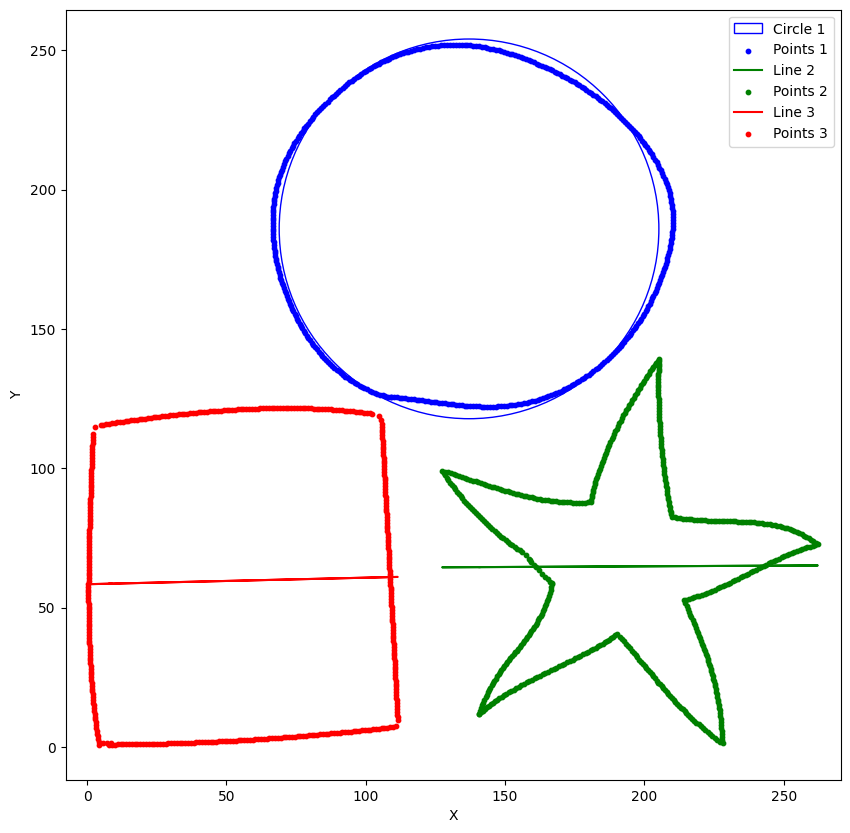

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/isolated.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

Arc length: 361.53527220614757, Radius: 50.36662020337001
Arc length: 366.33977925361705, Radius: 55.89966125744106
Arc length: 119.41818521700078, Radius: 18.963949292371066


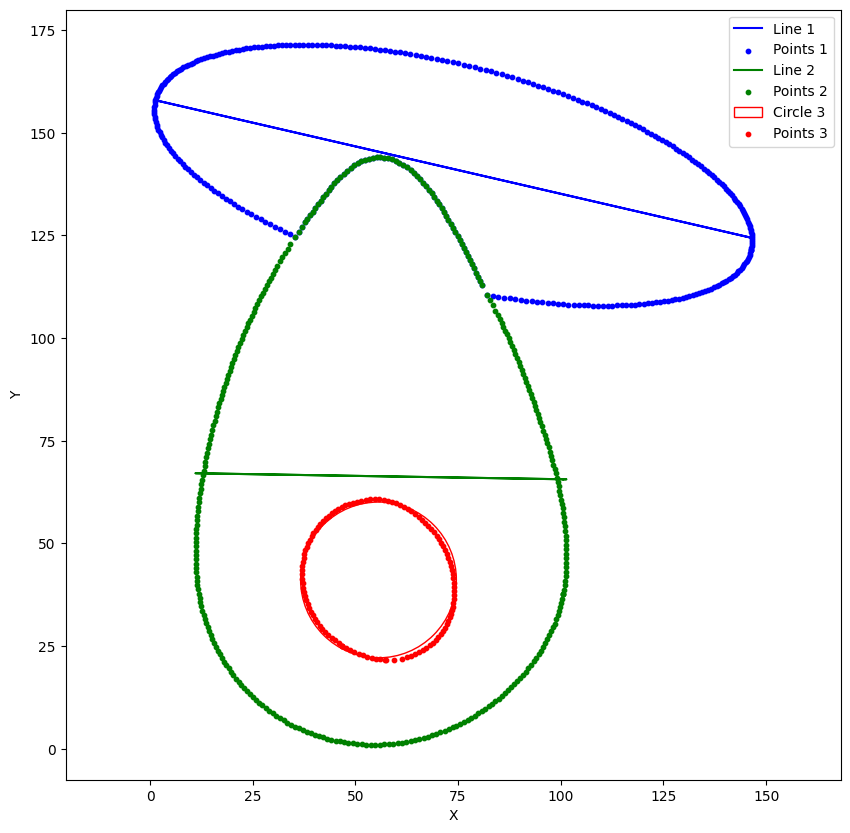

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/occlusion1.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)

Arc length: 59.14181473218423, Radius: 8.229904609659368
Arc length: 65.8284325508868, Radius: 9.263663303658506
Arc length: 476.8776344469782, Radius: 72.94874362858323
Arc length: 367.1722570798869, Radius: 50.59288455320011
Arc length: 646.5136542313021, Radius: 219.38686842576314


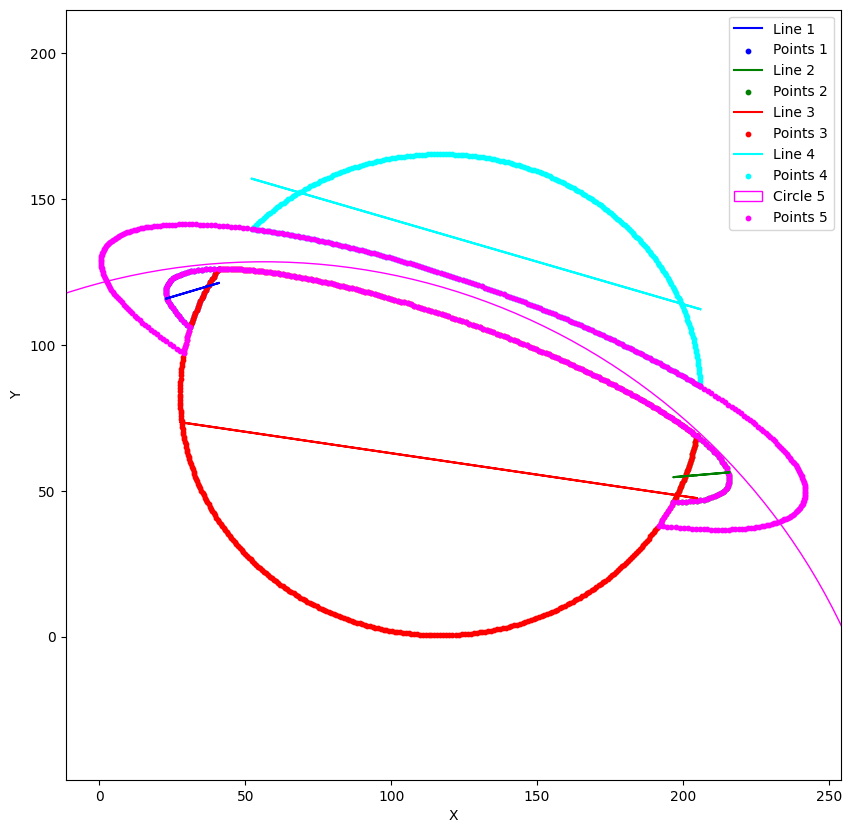

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from sklearn.linear_model import LinearRegression

# Helper function to calculate distances from the center
def calc_R(xc, yc, x, y):
    return np.sqrt((x - xc)**2 + (y - yc)**2)

# Function to optimize
def f_2(c, x, y):
    Ri = calc_R(*c, x, y)
    return Ri - Ri.mean()

# Function to detect circles
def detect_circle(coords):
    x, y = coords[:, 0], coords[:, 1]
    x_m, y_m = np.mean(x), np.mean(y)
    initial_guess = [x_m, y_m]
    res = least_squares(f_2, initial_guess, args=(x, y))
    xc, yc = res.x
    Ri = calc_R(xc, yc, x, y)
    R = Ri.mean()
    return xc, yc, R

# Function to detect lines
def detect_line(coords):
    x, y = coords[:, 0], coords[:, 1]
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    return model.coef_[0], model.intercept_

# Function to plot detected shapes
def plot_shapes(coordinates, labels, circle_params):
    plt.figure(figsize=(10, 10))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    def circles_overlap(c1, c2):
        if c1[0] is None or c2[0] is None:
            return False
        dist_centers = np.sqrt((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2)
        return dist_centers < (c1[2] + c2[2])

    for i, coords in enumerate(coordinates):
        x, y = coords[:, 0], coords[:, 1]
        label = labels[i]
        if label == 'line':
            coef, intercept = detect_line(coords)
            plt.plot(x, coef * x + intercept, color=colors[i % len(colors)], label=f'Line {i+1}')
        elif label == 'circle':
            xc, yc, R = circle_params[i]
            # Check for overlap with previously drawn circles
            overlap = False
            for j in range(i):
                if circles_overlap(circle_params[i], circle_params[j]):
                    overlap = True
                    break
            if not overlap:
                circle = plt.Circle((xc, yc), R, color=colors[i % len(colors)], fill=False, label=f'Circle {i+1}')
                plt.gca().add_artist(circle)
        plt.scatter(x, y, color=colors[i % len(colors)], s=10, label=f'Points {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Function to read CSV and parse paths and coordinates
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Load paths and coordinates
csv_path = r"/content/occlusion2.csv"

paths_XYs = read_csv(csv_path)

# Flatten paths_XYs to get coordinates array
coordinates = [item for sublist in paths_XYs for item in sublist]

labels = []
circle_params = []

for coords in coordinates:
    if len(coords) < 3:
        labels.append('line')
        circle_params.append((None, None, None))
        continue

    # Check if the points form a line
    coef, intercept = detect_line(coords)
    residuals = np.abs(coords[:, 1] - (coef * coords[:, 0] + intercept))
    if np.max(residuals) < 1e-2:  # Tolerance for line fitting
        labels.append('line')
        circle_params.append((None, None, None))
    else:
        # Check if the points form a circle
        xc, yc, R = detect_circle(coords)
        Ri = calc_R(xc, yc, coords[:, 0], coords[:, 1])
        std_dev = np.std(Ri)

        # Calculate the arc length
        arc_length = np.sum(np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2))
        print(f"Arc length: {arc_length}, Radius: {R}")  # Print arc length and radius

        # If the radius is greater than the arc length, detect it as a line
        if R > arc_length:
            labels.append('line')
            circle_params.append((None, None, None))
        else:
            if std_dev < 0.1 * R:
                labels.append('circle')
                circle_params.append((xc, yc, R))
            else:
                labels.append('line')
                circle_params.append((None, None, None))

# Plot shapes
plot_shapes(coordinates, labels, circle_params)